# Projekt - PR

## Opis

Opis problema: Raziskovali bomo prodajo (oz. registracijo novih vozi). Pri teh podatkih se bomo osredotočili na podatke o motorju vozila; torej o porabi, prostornini, vrsti goriva in izpustih. Iz le-teh bomo pridobili podatke o tem, koliko motroji posatajao učinkovitejši. Prav tako lahko z kombiniranjem teh podatkov z spolom, starostjo in ali je vozilo registrirala pravna oseba ugotovimo, koliko učinkovitost motorja vpliva pri nakupu vozil.

Cilji: Spreminjanje motorjev skozi čas. Pridobiti podatke o učinkovitosti motorja. Koliko je učinkovitost motorja pri nakupu avta pomembna za osebe ali podjetja. Napovedati kdaj bodo električni avtomobili dosegli 50% od vseh novih registracij.

Vir podatkov:
    - https://podatki.gov.si - Prvič registrirana vozila po mesecih
    - https://data.europa.eu/euodp

Oblka podatkov: Podatki so txt obliki. Iz podatkov "Prvič registrirana vozila po mesecih" lahko razberemo podatke o osebi, ki je registrirala avto (spol, starost, ...) in podatke oavtomobilu (poraba, medosna razdalja, max teža, model avta, ...)

## Podatki

Pridobili smo podatke o avtih iz slovenije. Le-te smo tudi že uredili.

Pri pridobivanju evropskih podatkov, še nismo uspeli najti takšnih, ki bi nam najbolj ustrezali.

## Procesiranje podatkov

### Branje

Začeli smo z branjem podatkov iz datoteke.

Podatki so ločeni z ";", ampak pojavil se je problem, da je bil le-ta znak uporabljen tudi za ločevanje podatkov znotraj že ločenih podatkov.
Zaradi tega, smo se odločili podatke ločevati z znakom "\"" in zavreči vsak 2. znak (ki je v tem primeru ";").

Vse kar se je prebralo shranimo v tabelo data, ki vsebuje slovarje, kjer so po atributih shranjeni podatki za posamezne vrstice.

Ker je datoteka zelo velika (1 200 000 vsrtic) in ker to zasede zelo veliko pomnilnika in časa ko je shranjeno in ko se obdeluje, bomo za samo testiranje delovanja kode uporabljali datoteko sestavljeno iz prvih 10 000 vrstic originalne datoteke.

In [2]:
import math
import operator
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from csv import DictReader

file = open('podatki_vozila_SLO_urejeno_okrajsano.txt', 'r', encoding='latin-1')
data = []

attributes = []

for attr in file.readline().split(";"):
    attributes.append(attr)
    
for i, line in enumerate(file):
    dataLine = {}
    dataLine["id"] = i
    
    for l, item in enumerate(line.split("\"")):
        if(l%2 != 0):
            dataLine[attributes[(int)((l-1)/2)]] = item
    
    data.append(dataLine)
    
    #if(i % 1000 == 0):
    #    print("Nalaganje", i/100+10)
    
print("Nalaganje končano")

Nalaganje končano


## Shranjevanje prebranih podatkov

Spodaj je primer kako so podatki shranjeni.

Iz spodnjih podatkov bomo kasneje odranili večino atributov, saj nas ne zanimajo.

In [3]:
print(data[1])

{'"V.4-HC + Nox"': '0,258', '"5A-Leto izdelave"': '2008', '"Izvajalna enota prve registracije"': 'AVTOCENTER d.o.o.', '"F.3-Najvecja dovoljena masa skupine vozil pri registraciji"': '3130', '"D.4.2-Drzava (koda)"': 'FRA', '"N.1-Dovoljene osne obremenitve"': '1160/1210', '"Z.1-Dovoljene pnevmatike in platisca"': '215/65R15 94H,215/55R16 93V,215/50R17 95W,215/45R18 93W', '"8B-Namen vozila"': '', '"S.2-Stevilo stojisc"': '', '"V.6.3-Temperatura olja"': '-35/150', '"R-Barva vozila (opis)"': 'kovinski - MODRA - SVETLA', '"C2-Starost lastnika vozila"': '38', '"2A-Datum prve registracije vozila v SLO"': '25.03.2011', '"V.5-Delci pri dizel motorjih"': '0,004', '"V.11.3-Temperatura olja"': '', '"P.1.4-Nazivna vrtilna frekvenca"': '4000', '"Komerc. oznaka  do prvega /"': 'C4 PICASSO ', '"V.7-CO2"': '155', '"4A-Podvrsta tablice prve registracije"': 'NT', '"X.2-Homologacijska oznaka zascitne konstrukcije"': '', '"C-Starost uporabnika vozila"': '38', '"J-Kategorija in vrsta vozila (oznaka)"': 'M1',

### Nekaj prikazov podatkov

Vrsta goriva

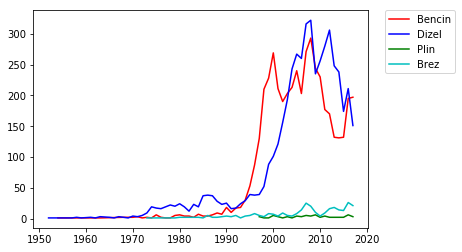

In [29]:
letaIzdelave = [[], [], [], []]

x=[[], [], [], []]
y=[[], [], [], []]

for podatek in data:
    if podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin":
        letaIzdelave[0].append(podatek['"5A-Leto izdelave"'])
        #y[0].append(podatek['"B-Datum prve registracije vozila"'])
    
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Dizel":
        letaIzdelave[1].append(podatek['"5A-Leto izdelave"'])
        #y[1].append(podatek['"B-Datum prve registracije vozila"'])
        
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin/Utek. naft. plin":
        letaIzdelave[2].append(podatek['"5A-Leto izdelave"'])
        
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Ni goriva":
        letaIzdelave[3].append(podatek['"5A-Leto izdelave"'])
        
for i in 0, 1, 2, 3:
    for leto in sorted(letaIzdelave[i]):
        if(leto not in x[i]):
            x[i].append(leto)
            y[i].append(letaIzdelave[i].count(leto))
            
            
            
plt.figure(0)
plt.plot(x[0], y[0], "r-", label="Bencin")
plt.plot(x[1], y[1], "b-", label="Dizel")
plt.plot(x[2], y[2], "g-", label="Plin")
plt.plot(x[3], y[3], "c-", label="Brez")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Kupovanje avtov glede na spol

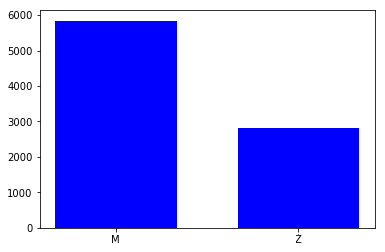

In [37]:
m = 0
z = 0

for podatek in data:
    if podatek['"C-Spol uporabnika (ce gre za fizicno osebo)"'] == "M":
        m += 1
    elif podatek['"C-Spol uporabnika (ce gre za fizicno osebo)"'] == "Z":
        z += 1

y = [m, z]
N = len(y)
x = range(N)

plt.figure(1)
plt.bar(x, y, width, color="blue")
plt.xticks(range(N))
plt.gca().set_xticklabels(["M", "Ž"])
plt.show()

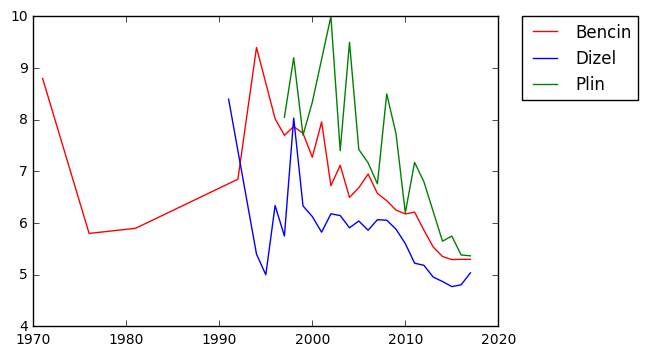

In [54]:
#dict.setdefault(key, default=0)
letaIzdelave = [[], [], []]

povpPoraba = [{}, {}, {}]

x=[[], [], []]
y=[[], [], []]

for podatek in data:
    if podatek['"V.8-Kombinirana poraba goriva"'] == "":
        continue
        
    if podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin":
        letaIzdelave[0].append(podatek['"5A-Leto izdelave"'])
        
        if podatek['"5A-Leto izdelave"'] in povpPoraba[0]:
            value = povpPoraba[0][podatek['"5A-Leto izdelave"']][0] + float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.'))
            stev = povpPoraba[0][podatek['"5A-Leto izdelave"']][1] + 1
            povpPoraba[0][podatek['"5A-Leto izdelave"']] = [value, stev]
        else:
            povpPoraba[0][podatek['"5A-Leto izdelave"']]  = [float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.')), 1]
        
        #povpPoraba[0][podatek['"5A-Leto izdelave"']] = [povpPoraba[0][podatek['"5A-Leto izdelave"']]+podatek['"5A-Leto izdelave"'], ]
        #y[0].append(podatek['"B-Datum prve registracije vozila"'])
    
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Dizel":
        letaIzdelave[1].append(podatek['"5A-Leto izdelave"'])
        
        if podatek['"5A-Leto izdelave"'] in povpPoraba[1]:
            value = povpPoraba[1][podatek['"5A-Leto izdelave"']][0] + float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.'))
            stev = povpPoraba[1][podatek['"5A-Leto izdelave"']][1] + 1
            povpPoraba[1][podatek['"5A-Leto izdelave"']] = [value, stev]
        else:
            povpPoraba[1][podatek['"5A-Leto izdelave"']]  = [float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.')), 1]
        
        
        #y[1].append(podatek['"B-Datum prve registracije vozila"'])
        
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin/Utek. naft. plin":
        letaIzdelave[2].append(podatek['"5A-Leto izdelave"'])
        
        if podatek['"5A-Leto izdelave"'] in povpPoraba[2]:
            value = povpPoraba[2][podatek['"5A-Leto izdelave"']][0] + float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.'))
            stev = povpPoraba[2][podatek['"5A-Leto izdelave"']][1] + 1
            povpPoraba[2][podatek['"5A-Leto izdelave"']] = [value, stev]
        else:
            povpPoraba[2][podatek['"5A-Leto izdelave"']]  = [float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.')), 1]
        
        
for i in 0, 1, 2:
    for leto in sorted(povpPoraba[i].keys()):
        if(leto not in x[i]):
            x[i].append(leto)
            y[i].append(povpPoraba[i][leto][0]/povpPoraba[i][leto][1])
            
plt.figure(0)
plt.plot(x[0], y[0], "r-", label="Bencin")
plt.plot(x[1], y[1], "b-", label="Dizel")
plt.plot(x[2], y[2], "g-", label="Plin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

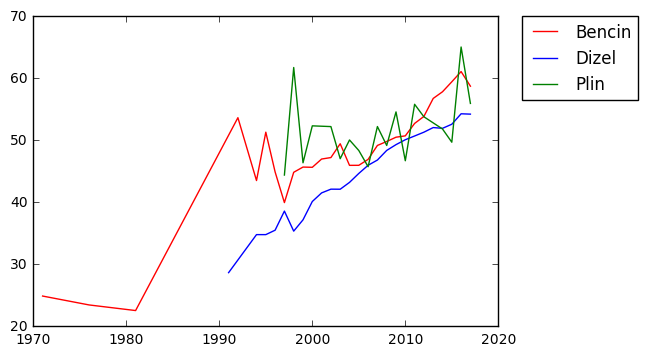

In [55]:
#dict.setdefault(key, default=0)
letaIzdelave = [[], [], []]
arrId = 0

povpKonjNaLiter = [{}, {}, {}]

x=[[], [], []]
y=[[], [], []]

for podatek in data:
    if podatek['"V.8-Kombinirana poraba goriva"'] == "":
        continue
        
    if podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin":
        arrId = 0
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Dizel":
        arrId = 1
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin/Utek. naft. plin":
        arrId = 2
        
    letaIzdelave[arrId].append(podatek['"5A-Leto izdelave"'])
    
    konjNaLiter = float(podatek['"P.1.2-Nazivna moc"'].replace(',','.')) / (float(podatek['"P.1.1-Delovna prostornina"'].replace(',','.')) / 1000)
    
    if podatek['"5A-Leto izdelave"'] in povpKonjNaLiter[arrId]:
        value = povpKonjNaLiter[arrId][podatek['"5A-Leto izdelave"']][0] + konjNaLiter
        stev = povpKonjNaLiter[arrId][podatek['"5A-Leto izdelave"']][1] + 1
        povpKonjNaLiter[arrId][podatek['"5A-Leto izdelave"']] = [value, stev]
    else:
        povpKonjNaLiter[arrId][podatek['"5A-Leto izdelave"']]  = [konjNaLiter, 1]

        
for i in 0, 1, 2:
    for leto in sorted(povpKonjNaLiter[i].keys()):
        if(leto not in x[i]):
            x[i].append(leto)
            y[i].append(povpKonjNaLiter[i][leto][0]/povpKonjNaLiter[i][leto][1])
            
plt.figure(0)
plt.plot(x[0], y[0], "r-", label="Bencin")
plt.plot(x[1], y[1], "b-", label="Dizel")
plt.plot(x[2], y[2], "g-", label="Plin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()